In [1]:
%%info

In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1587601412743_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1  
boto                       2.49.0 
jmespath                   0.9.4  
lxml                       4.4.2  
mysqlclient                1.4.6  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pip                        20.0.2 
py-dateutil                2.2    
python36-sagemaker-pyspark 1.2.6  
pytz                       2019.3 
PyYAML                     3.11   
setuptools                 46.1.3 
six                        1.13.0 
soupsieve                  1.9.5  
wheel                      0.34.2 
windmill                   1.6

In [3]:
sc.install_pypi_package("pandas==1.0.3")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1  
boto                       2.49.0 
jmespath                   0.9.4  
lxml                       4.4.2  
mysqlclient                1.4.6  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pandas                     1.0.3  
pip                        20.0.2 
py-dateutil                2.2    
python-dateutil            2.8.1  
python36-sagemaker-pyspark 1.2.6  
pytz                       2019.3 
PyYAML                     3.11   
setuptools                 46.1.3 
six                        1.13.0 
soupsieve                  1.9.5  
wheel                      0.34.2 
windmill                   1.6

In [5]:
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
df = spark.read.csv('s3://spark-dataset/2013-09 - Citi Bike trip data.csv', header='true', inferSchema = True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# df = spark.read.csv('s3://sta9760-spark-datasets/*.csv', header='true', inferSchema = True)

# in case we wish to uplaod all the csv files from citi bike example

# Instead (notice the *) then all of the data would have been loaded into a single dataframe object in spark. 
#At this point, we can run dataframe methods (remember, this is the PySpark.dataframe, not pandas.dataframe) as per usual

In [7]:
# Total columns
print(f'Total Columns: {len(df.dtypes)}')
print(f'Total Rows: {df.count():,}')
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 15
Total Rows: 1,034,359
root
 |-- tripduration: integer (nullable = true)
 |-- starttime: timestamp (nullable = true)
 |-- stoptime: timestamp (nullable = true)
 |-- start station id: integer (nullable = true)
 |-- start station name: string (nullable = true)
 |-- start station latitude: double (nullable = true)
 |-- start station longitude: double (nullable = true)
 |-- end station id: integer (nullable = true)
 |-- end station name: string (nullable = true)
 |-- end station latitude: double (nullable = true)
 |-- end station longitude: double (nullable = true)
 |-- bikeid: integer (nullable = true)
 |-- usertype: string (nullable = true)
 |-- birth year: string (nullable = true)
 |-- gender: integer (nullable = true)

In [8]:

df.createOrReplaceTempView('Citibike')

sqldf = spark.sql(
'''
SELECT `end station name`, COUNT ( `end station name`) as most_popular_stations FROM Citibike
GROUP BY `end station name`
ORDER BY most_popular_stations DESC
LIMIT 5
'''
)

sqldf.toPandas().plot.bar()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

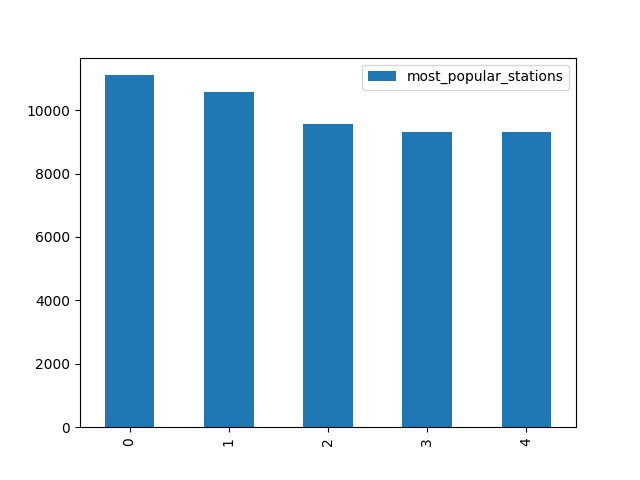

In [10]:
%matplot plt